# LIBRAS - POC 1

## CNN for 5 classes Classification

- What to solve:

- 

- Technologies:

- Database:


In [1]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Convolutional Neural Network

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 22, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 22)                2838      
Total para

In [16]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 5,
                                   rotation_range = 10,
                                   zoom_range = 0.1,
                                   horizontal_flip = False,
                                   validation_split=0.25)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('../../Datasets_proprios/dataset_estatico/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
                                                            'i', 'l', 'm', 'n', 'o', 'p', 'q',
                                                            'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],
                                                 subset='training')

test_set = test_datagen.flow_from_directory('../../Datasets_proprios/dataset_estatico/test/',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'categorical',
                                           classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
                                                      'i', 'l', 'm', 'n', 'o', 'p', 'q',
                                                      'r', 's', 't', 'u', 'v', 'w', 'x', 'y'])

validation_set = train_datagen.flow_from_directory(
    '../../Datasets_proprios/dataset_estatico/train/', # same directory as training data
    target_size=(64, 64),
    batch_size=64,
    class_mode = 'categorical',
    classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
               'i', 'l', 'm', 'n', 'o', 'p', 'q',
               'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],

    subset='validation') # set as validation data


Found 5874 images belonging to 22 classes.
Found 419 images belonging to 22 classes.
Found 1945 images belonging to 22 classes.


In [5]:
classifier.fit_generator(training_set,
                         epochs = 10,
                         validation_data=(validation_set),
                         steps_per_epoch = 300,
                         validation_steps = 10)

classifier.save('models/model5.h5')

Epoch 1/10
 41/300 [===>..........................] - ETA: 36s - loss: 1.1525 - acc: 0.6757

KeyboardInterrupt: 

In [17]:
trained_model = keras.models.load_model('models/model5.h5')
trained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 22)                2838      
Total para

In [18]:
trained_model.evaluate_generator(generator=test_set, steps=32, verbose = 1)

32/32 [==============================] - 1s 44ms/step


[0.6890189139542996, 0.9430641822563195]

In [22]:
test_set = test_datagen.flow_from_directory('../../Datasets_proprios/dataset_estatico/test/',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           shuffle=False,
                                           class_mode = 'categorical',
                                           classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
                                                      'i', 'l', 'm', 'n', 'o', 'p', 'q',
                                                      'r', 's', 't', 'u', 'v', 'w', 'x', 'y'])

pred=trained_model.predict_generator(test_set,verbose=1, steps=32)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

Found 419 images belonging to 22 classes.
32/32 [==============================] - 1s 44ms/step


In [48]:
filenames=test_set.filenames
for i in range(len(filenames)):
    filenames[i] = filenames[i][:1]
results=pd.DataFrame({"Class":filenames,
                      "Prediction":predictions[0:419]})

In [91]:
results['Correct'] = results.eq(results)

In [129]:
stats = results.set_index(["Class", "Prediction"]).count(level="Class").transpose().drop('freq', axis=0)

In [130]:
stats

Class     a   b   c   d   e   f   g   i   l   m  ...   o   p   q   r   s   t  \
Correct  20  20  20  20  21  20  20  18  20  20  ...  20  20  20  20  20  20   

Class     u   v   w   y  
Correct  20  20  20  20  

[1 rows x 21 columns]

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

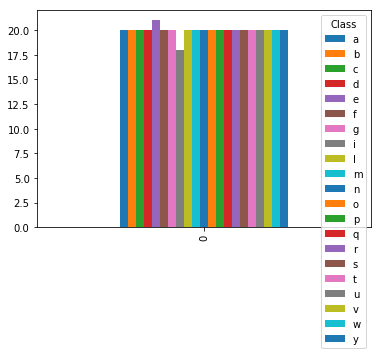

In [132]:
stats.reset_index().plot(kind='bar')